# Data Analysis

In [2]:
# Import packages

import os
import math

import numpy as np
import pandas as pd

from scipy import stats
import pingouin as pg
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

# Customize Pandas
# pd.options.display.float_format = '{:,.2f}'.format

# Customize Seaborn
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.2)

# I. Data preprocessing

## Total

#### Correct Answers

In [11]:
df_correct = pd.read_csv("totalcorrect.txt", sep = "\t")
df_correct

,Serial_position,1,2,3,4
0,1,0.700000,0.687500,0.794118,0.787879
1,2,0.608696,0.654762,0.702703,0.822581
2,3,0.568421,0.623529,0.645570,0.638889
3,4,0.470085,0.530000,0.701493,0.737705
4,5,0.469027,0.441441,0.555556,0.529412
5,6,0.284091,0.365217,0.437500,0.543478
6,7,0.371429,0.322581,0.430556,0.446809
7,8,0.362319,0.377049,0.535211,0.490566
8,9,0.454545,0.531250,0.555556,0.719298


In [12]:
# Unpivot the DataFrame from wide to long format
df_correct_long = df_correct.melt(id_vars=["Serial_position"])
df_correct_long["Serial_position"] = df_correct_long["Serial_position"].astype("category")
df_correct_long["variable"] = df_correct_long["variable"].astype("category")
df_correct_long

,Serial_position,variable,value
0,1,1,0.700000
1,2,1,0.608696
2,3,1,0.568421
3,4,1,0.470085
4,5,1,0.469027
5,6,1,0.284091
6,7,1,0.371429
7,8,1,0.362319
8,9,1,0.454545
9,1,2,0.687500


#### Errors

In [13]:
# Read error.txt as dataframe
df_error = pd.read_csv("totalerror.txt", sep = "\t")
df_error

,Transposition,1,2,3,4
0,T1 + 1,0.086420,0.064516,0.000000,NaN
1,T2 - 1,0.070312,0.210526,0.052632,0.000000
2,T2 + 1,0.095238,0.170213,0.120000,0.333333
3,T3 - 1,0.157143,0.076923,0.200000,0.375000
4,T3 + 1,0.100775,0.087719,0.600000,0.250000
5,T4 - 1,0.120482,0.090909,0.200000,0.000000
6,T4 + 1,0.076023,0.172414,0.100000,0.166667
7,T5 - 1,0.102703,0.126761,0.071429,1.000000
8,T5 + 1,0.109005,0.181818,0.125000,0.000000
9,T6 - 1,0.118557,0.191176,0.114286,0.000000


In [14]:
# Unpivot the DataFrame from wide to long format
df_error_long = df_error.melt(id_vars=["Transposition"])
df_error_long["variable"] = df_error_long["variable"].astype("category")
df_error_long

,Transposition,variable,value
0,T1 + 1,1,0.086420
1,T2 - 1,1,0.070312
2,T2 + 1,1,0.095238
3,T3 - 1,1,0.157143
4,T3 + 1,1,0.100775
...,...,...,...
59,T7 - 1,4,0.294118
60,T7 + 1,4,0.105263
61,T8 - 1,4,0.272727
62,T8 + 1,4,0.100000


## Stimuli

#### Audio

In [15]:
df_audiocorrect = pd.read_csv("audiocorrect.txt", sep = "\t")

df_audiocorrect_long = df_audiocorrect.melt(id_vars=["Serial_position"])
df_audiocorrect_long["answer"] = "correct"
df_audiocorrect_long["stimuli"] = "audio"


df_audioerror = pd.read_csv("audioerror.txt", sep = "\t")

df_audioerror_long = df_audioerror.melt(id_vars=["Transposition"])
df_audioerror_long["answer"] = "errors"
df_audioerror_long["stimuli"] = "audio"
df_audioerror_long["Transposition"] = df_audioerror_long["Transposition"].astype("category")
df_audioerror_long["variable"] = df_audioerror_long["variable"].astype("category")

#### Visual

In [16]:
df_visualcorrect = pd.read_csv("visualcorrect.txt", sep = "\t")

df_visualcorrect_long = df_visualcorrect.melt(id_vars=["Serial_position"])
df_visualcorrect_long["answer"] = "correct"
df_visualcorrect_long["stimuli"] = "visual"


df_visualerror = pd.read_csv("visualerror.txt", sep = "\t")

df_visualerror_long = df_visualerror.melt(id_vars=["Transposition"])
df_visualerror_long["answer"] = "errors"
df_visualerror_long["stimuli"] = "visual"
df_visualerror_long["Transposition"] = df_visualerror_long["Transposition"].astype("category")
df_visualerror_long["variable"] = df_visualerror_long["variable"].astype("category")

# II. Couture's Replication

## A. Audio

### A0. Visualization

In [17]:
# audio slopes
df_audio_correct_error = pd.concat([df_audiocorrect_long, df_audioerror_long], axis=0)
df_audio_correct_error = df_audio_correct_error.drop(["Serial_position", "Transposition"], axis=1)

# audio mean slopes
df_audio_correct_slopes = pd.Series((df_audiocorrect.iloc[:, 1:].mean())).reset_index(drop=True)
x1_audio = df_audio_correct_slopes.index; y1_audio = df_audio_correct_slopes
res1_audio = stats.linregress(x=x1_audio, y=y1_audio)

df_audio_error_slopes = pd.Series((df_audioerror.iloc[:, 1:].mean())).reset_index(drop=True)
x2_audio = df_audio_error_slopes.index; y2_audio = df_audio_error_slopes
res2_audio = stats.linregress(x=x2_audio, y=y2_audio)

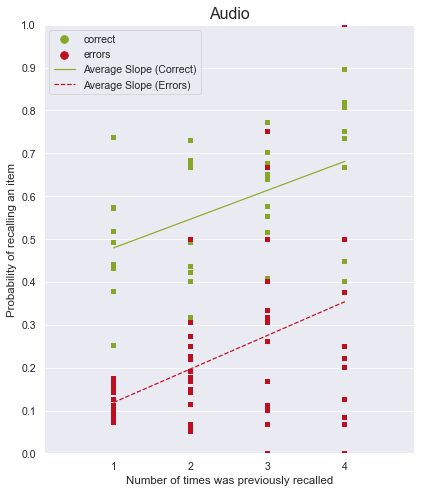

In [19]:
fig, ax = plt.subplots(figsize=(6, 7))

# Plot strip plot of both correct answers and errors
sns.stripplot(data= df_audio_correct_error, y="value", x="variable", 
                                      hue="answer", jitter=False,
                                      palette=["#88A626", "#BC1021"],
                                      marker="s")

# Plot linear regression of correct slopes
ax.plot(x1_audio, res1_audio.intercept + res1_audio.slope * x1_audio, '#8CAB27', label="Average Slope (Correct)")

# Plot linear regression of errors slopes
ax.plot(x2_audio, res2_audio.intercept + res2_audio.slope * x2_audio, '#BC1021', label="Average Slope (Errors)")
ax.lines[1].set_linestyle("--")

# Customize ticks of y axis
plt.ylim([0, 1])
plt.yticks(np.arange(0.0, 1.1, 0.1))

# Customize labels of x axis and y axis
plt.xlabel("Number of times was previously recalled")
plt.ylabel("Probability of recalling an item")

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 3, 0, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')

plt.title("Audio", size=16)
plt.margins(0.3)
plt.tight_layout()
plt.savefig("graph01 - audio")
plt.show()

### A1. ANOVA

#### Correct answers

In [20]:
pg.rm_anova(data=df_audiocorrect_long, dv="value", within="variable", subject="Serial_position")

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,variable,3,24,8.197791,0.000626,0.506105,0.637775


#### Incorrect answers

In [21]:
pg.rm_anova(data=df_audioerror_long, dv="value", within="variable", subject="Transposition", correction=True)

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,variable,3,39,2.72366,0.057275,0.09893,0.173221,0.529081,False,0.120909,0.000165


## B. Visual

### B0. Visualization

In [78]:
# visual slopes
df_visual_correct_error = pd.concat([df_visualcorrect_long, df_visualerror_long], axis=0)
df_visual_correct_error = df_visual_correct_error.drop(["Serial_position", "Transposition"], axis=1)

# visual mean slopes
df_visualcorrect_slopes = pd.Series((df_visualcorrect.iloc[:, 1:].mean())).reset_index(drop=True)
x1_visual = df_visualcorrect_slopes.index; y1_visual = df_visualcorrect_slopes
res1_visual = stats.linregress(x=x1_visual, y=y1_visual)

df_visualerror_slopes = pd.Series((df_visualerror.iloc[:, 1:].mean())).reset_index(drop=True)
x2_visual = df_visualerror_slopes.index; y2_visual = df_visualerror_slopes
res2_visual = stats.linregress(x=x2_visual, y=y2_visual)

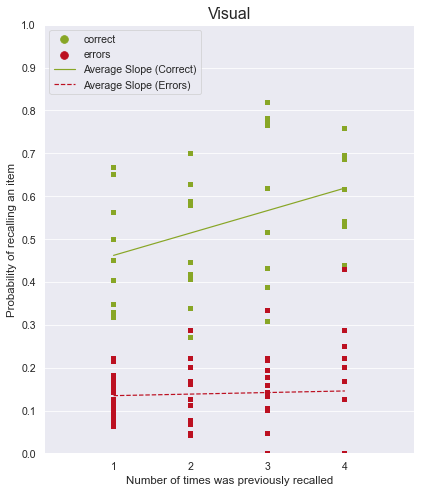

In [79]:
fig, ax = plt.subplots(figsize=(6, 7))

# Plot strip plot of both correct answers and errors
sns.stripplot(data= df_visual_correct_error, y="value", x="variable", 
                                      hue="answer", jitter=False,
                                      palette=["#88A626", "#BC1021"],
                                      marker="s")

# Plot linear regression of correct slopes
ax.plot(x1_visual, res1_visual.intercept + res1_visual.slope * x1_visual, '#88A626', label="Average Slope (Correct)")

# Plot linear regression of errors slopes
ax.plot(x2_visual, res2_visual.intercept + res2_visual.slope * x2_visual, '#BC1021', label="Average Slope (Errors)")
ax.lines[1].set_linestyle("--")

# Customize ticks of y axis
plt.ylim([0, 1])
plt.yticks(np.arange(0.0, 1.1, 0.1))

# Customize labels of x axis and y axis
plt.xlabel("Number of times was previously recalled")
plt.ylabel("Probability of recalling an item")

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 3, 0, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left')

plt.title("Visual", size=16)
plt.margins(0.3)
plt.tight_layout()
plt.savefig("graph02 - visual")
plt.show()

### B1. ANOVA

#### Correct answers

In [81]:
pg.rm_anova(data=df_visualcorrect_long, dv="value", within="variable", subject="Serial_position")

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,variable,3,24,6.760579,0.001829,0.458016,0.568996


#### Incorrect answers

In [83]:
pg.rm_anova(data=df_visualerror_long, dv="value", within="variable", subject="Transposition")

,Source,ddof1,ddof2,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,variable,3,33,0.301426,0.824118,0.70069,0.026672,0.546667,False,0.263347,0.024339


## C. Audio vs Visual

In [93]:
df_audioerror_long.to_csv("df_audioerror.csv")

In [94]:
# Save as csv
df_visualerror_long.to_csv("df_visualerror.csv")

The independent t-test analysis was done in Excel. Please see the file *Hebb_ttest* for the results.

#### 